In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestRegressor

## PREPARE THE DATASET

* read the dataset from csv
* visualize it
* select the training input sample `X`
* select the target values `y` (real numbers in regression)

In [60]:
dataset = pd.read_csv("data/position_salaries.csv")
dataset

,position,level,salary
0,business_analyst,1,45000
1,junior_consultant,2,50000
2,senior_consultant,3,60000
3,manager,4,80000
4,country_manager,5,110000
5,region_manager,6,150000
6,partner,7,200000
7,senior_partner,8,300000
8,c_level,9,500000
9,ceo,10,1000000


In [18]:
X = dataset.iloc[:, 1:2].values #level
y = dataset.iloc[:, 2].values #salary

## REGRESSION

* create a RandomForestRegressor instance
* fit the model

In [21]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [27]:
#Compute accuracy
score = f"{regressor.score(X, y) * 100}%"
print(f"This model has a training accuracy of {score}")

This model has a training accuracy of 97.04434230386582%


## PREDICTION

Perform prediction on sample levels

In [67]:
sample_levels = [3.5, 8.5, 1]
predictions = []
pred_df = pd.DataFrame(index=sample_levels)
for level in sample_levels:
    pred = regressor.predict([[level]])
    predictions.append(pred[0])

pred_df['predicted_salary'] = predictions
pred_df.head()

,predicted_salary
3.5,68000.0
8.5,390000.0
10.0,850000.0


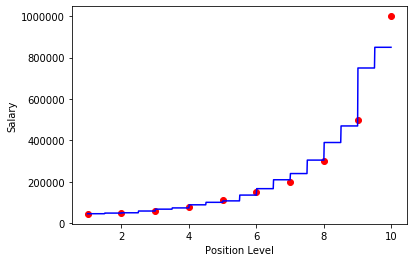

In [69]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color="red")
plt.plot(X_grid, regressor.predict(X_grid), color = "blue")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()